In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-23.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-24.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-25.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-26.csv')
df5 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-27.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-30.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/aczepielik/KRKtram/master/reports/report_07-31.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])
df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [3]:
df.sample(10)  

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
4571,328,2018-07-30 06:15:01,623,Dworcowa,6,Salwator,2018-07-30 06:13:00,6.352185e+18,6351558574044528643,PREDICTED,2,8.0
51503,1771,2018-07-31 17:29:46,2685,Jarzębiny,1,Salwator,2018-07-31 17:28:00,6.352185e+18,6351558574044369166,STOPPING,1,2.0
54142,1832,2018-07-30 18:08:03,125,Rondo Mogilskie,52,Os.Piastów,2018-07-30 17:58:00,6.352185e+18,6351558574045052940,STOPPING,10,19.0
2878,270,2018-07-30 05:49:31,363,Hala Targowa,1,Wzgórza K.,2018-07-30 05:48:00,6.352185e+18,6351558574044352515,STOPPING,1,8.0
3697,299,2018-07-30 06:02:22,365,Rondo Grzegórzeckie,1,Wzgórza K.,2018-07-30 06:03:00,6.352185e+18,6351558574044356610,PREDICTED,0,9.0
55328,2238,2018-07-24 18:16:37,129,Cystersów,5,Krowodrza Górka,2018-07-24 18:16:00,6.352185e+18,6351558574044490258,STOPPING,0,17.0
34335,1505,2018-07-24 13:27:56,429,Klasztorna,16,Kopiec Wandy,2018-07-24 13:26:00,NaN,6351558574044752401,PLANNED,1,12.0
17127,761,2018-07-24 09:02:53,462,Agencja Kraków Wschód,22,Borek Fałęcki,2018-07-24 09:01:00,NaN,6351558574044903941,PLANNED,1,2.0
55615,2024,2018-07-23 18:49:19,589,Ruczaj,52,Czerwone Maki P+R,2018-07-23 18:49:00,6.352185e+18,6351558574045038860,STOPPING,0,34.0
29100,1027,2018-07-30 12:07:36,632,Dauna,6,Kurdwanów P+R,2018-07-30 12:09:00,6.352185e+18,6351558574044524554,PREDICTED,0,17.0


In [4]:
df[ df.tripId == 6351558574044883205 ]    #  Tram route with given id

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
70,3,2018-07-23 06:01:42,379,Piasta Kołodzieja,21,Kopiec Wandy,2018-07-23 06:00:00,NaN,6351558574044883205,PLANNED,1,2.0
135,6,2018-07-23 06:02:46,382,Kleeberga,21,Kopiec Wandy,2018-07-23 06:01:00,NaN,6351558574044883205,PLANNED,1,3.0
284,12,2018-07-23 06:04:54,388,Dunikowskiego,21,Kopiec Wandy,2018-07-23 06:03:00,NaN,6351558574044883205,PLANNED,1,4.0
414,17,2018-07-23 06:06:40,2539,Rondo Hipokratesa,21,Kopiec Wandy,2018-07-23 06:05:00,NaN,6351558574044883205,PLANNED,1,5.0
493,20,2018-07-23 06:07:43,392,DH Wanda,21,Kopiec Wandy,2018-07-23 06:06:00,NaN,6351558574044883205,PLANNED,1,6.0
697,28,2018-07-23 06:10:39,2745,Rondo Kocmyrzowskie im. Ks. Gorzelanego,21,Kopiec Wandy,2018-07-23 06:09:00,NaN,6351558574044883205,PLANNED,1,7.0
772,31,2018-07-23 06:11:43,418,Os.Zgody,21,Kopiec Wandy,2018-07-23 06:10:00,NaN,6351558574044883205,PLANNED,1,8.0
1007,40,2018-07-23 06:14:58,2744,Plac Centralny im. R.Reagana,21,Kopiec Wandy,2018-07-23 06:13:00,NaN,6351558574044883205,PLANNED,1,9.0
1137,45,2018-07-23 06:16:49,423,Struga,21,Kopiec Wandy,2018-07-23 06:15:00,NaN,6351558574044883205,PLANNED,1,10.0


In [5]:
df.delay.value_counts(normalize=True)   #  Number of occurrences of a given delay in percent

0     0.426947
1     0.351028
2     0.116196
3     0.055438
4     0.026082
5     0.011961
6     0.005463
7     0.002969
8     0.001553
9     0.000989
10    0.000663
11    0.000315
12    0.000140
13    0.000133
14    0.000089
15    0.000022
16    0.000006
19    0.000004
18    0.000002
Name: delay, dtype: float64

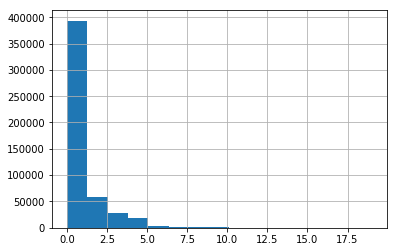

In [6]:
df.delay.hist(bins=15);

In [7]:
df.delay.describe()

count    505552.000000
mean          1.004029
std           1.310555
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          19.000000
Name: delay, dtype: float64

### Feature engineering

In [8]:
df['delay_secs'] = df['delay'].map(lambda x: x*60)
df['direction_cat'] = df['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace=True)
df['seq_num'].fillna(-1, inplace=True)

df['number_direction_id'] = df.apply(lambda x: '{} {}'.format( x['number'], x['direction'] ), axis=1).factorize()[0]

df['stop_direction_id'] = df.apply(lambda x: '{} {}'.format( x['stop'], x['direction'] ), axis=1).factorize()[0]


feats = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id',
    'stop_direction_id'    
]

X = df[ feats ].values
y = df [ 'delay_secs' ].values

model = DecisionTreeRegressor(max_depth=10, random_state=2020)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-47.03925853191205, 0.621220064883333)

In [9]:
df['plannedTime'] = pd.to_datetime( df['plannedTime'] )
df[['plannedTime']].info()

df['plannedTime'].dt.day.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505552 entries, 0 to 72416
Data columns (total 1 columns):
plannedTime    505552 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.7 MB


24    73200
26    73116
30    72755
31    72418
25    71896
23    71501
27    70639
1        16
28       11
Name: plannedTime, dtype: int64

In [11]:
df['plannedTime'].dt.dayofweek.value_counts()

1    145618
0    144256
3     73116
2     71912
4     70639
5        11
Name: plannedTime, dtype: int64

In [12]:
df['plannedTime'] = pd.to_datetime( df['plannedTime'] )  #  mapping to datetime

df['day'] = df['plannedTime'].dt.day
df['hour'] = df['plannedTime'].dt.hour
df['dayofweek'] = df['plannedTime'].dt.dayofweek

In [13]:
df[['plannedTime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505552 entries, 0 to 72416
Data columns (total 1 columns):
plannedTime    505552 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.7 MB


In [20]:
df['plannedTime'].dt.hour.value_counts()

7     31622
15    31619
8     31408
17    31203
16    31175
6     30395
18    30073
9     29910
14    28219
19    27847
11    26746
13    26678
12    26619
10    26365
20    24050
21    21226
22    19521
5     18273
23     9678
4      2819
0       106
Name: plannedTime, dtype: int64

In [19]:
df[['dayofweek']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505552 entries, 0 to 72416
Data columns (total 1 columns):
dayofweek    505552 non-null int64
dtypes: int64(1)
memory usage: 7.7 MB


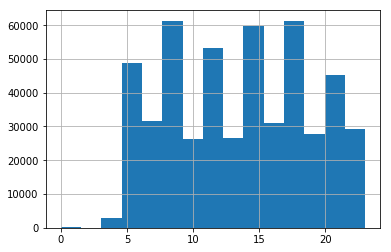

In [14]:
df.hour.hist(bins=15);

### Feature engineering - version 2

In [15]:
df['delay_secs'] = df['delay'].map(lambda x: x*60)
df['direction_cat'] = df['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace=True)
df['seq_num'].fillna(-1, inplace=True)

df['number_direction_id'] = df.apply(lambda x: '{} {}'.format( x['number'], x['direction'] ), axis=1).factorize()[0]

df['stop_direction_id'] = df.apply(lambda x: '{} {}'.format( x['stop'], x['direction'] ), axis=1).factorize()[0]


feats = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id',
    'stop_direction_id',
    'day',
    'hour',
    'dayofweek'
]

X = df[ feats ].values
y = df [ 'delay_secs' ].values


model = DecisionTreeRegressor(max_depth=10, random_state=2020)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-47.47939610601208, 0.637298924080673)

In [16]:
df['delay_secs'] = df['delay'].map(lambda x: x*60)
df['direction_cat'] = df['direction'].factorize()[0]
df['vehicleId'].fillna(-1, inplace=True)
df['seq_num'].fillna(-1, inplace=True)

df['number_direction_id'] = df.apply(lambda x: '{} {}'.format( x['number'], x['direction'] ), axis=1).factorize()[0]

df['stop_direction_id'] = df.apply(lambda x: '{} {}'.format( x['stop'], x['direction'] ), axis=1).factorize()[0]


feats = [
    'number',
    'stop',
    'direction_cat',
    'vehicleId',
    'seq_num',
    'number_direction_id',
    'stop_direction_id',
    'day',
    'hour',
    'dayofweek'
]

X = df[ feats ].values
y = df [ 'delay_secs' ].values

model = RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=8, random_state=2020)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-46.46220300209905, 0.5247037630766314)